In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from zipfile import ZipFile

In [2]:
with ZipFile('data/spotify.zip') as archive:
    file = archive.open('spotify_data.csv')
    spotify_df = pd.read_csv(file, index_col=0)
    file.close()

In [3]:
spotify_df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [22]:
spotify_df_sample = spotify_df.sample(1000)

Text(0, 0.5, 'danceability')

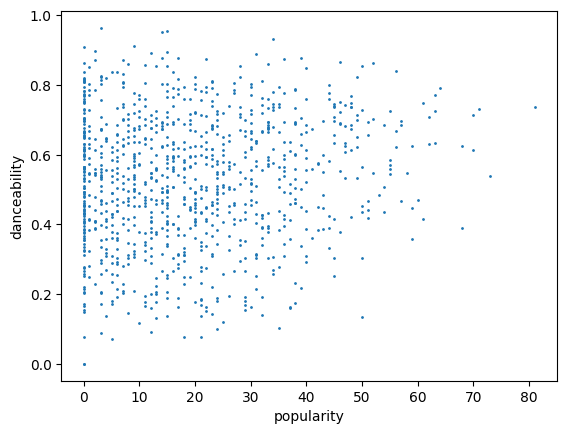

In [25]:
fig, ax = plt.subplots()
x = 'popularity'
y = 'danceability'
ax.scatter(spotify_df_sample[x], spotify_df_sample[y], s=1)
ax.set_xlabel(x)
ax.set_ylabel(y)

In [11]:
artist_location_df = pd.read_csv('data/artist_locations.csv')

In [12]:
def wikidata_coords_to_tuple(series):
    for i in range(series.size):
        series[i] = tuple(re.findall(r'[+-]?(\d*\.\d+|\d+\.\d*|\d+)', series[i]))

In [13]:
artist_location_df = artist_location_df[['personLabel', 'placeOfBirthLabel', 'coordinates']]
wikidata_coords_to_tuple(artist_location_df['coordinates'])
artist_location_df.head()

,personLabel,placeOfBirthLabel,coordinates
0,Alan Arkin,New York City,"(74.0, 40.7)"
1,Eugen Rex,Berlin,"(13.383333333, 52.516666666)"
2,Martin Helmchen,Berlin,"(13.383333333, 52.516666666)"
3,Lisa Bassenge,Berlin,"(13.383333333, 52.516666666)"
4,André Previn,Berlin,"(13.383333333, 52.516666666)"


In [14]:
artist_location_df['coordinates'][0][0]

'74.0'